In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from pandas import datetime
import datetime
from sklearn.tree import DecisionTreeRegressor


C:\Users\mande\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [3]:
os.getcwd()

'C:\\Users\\mande'

In [5]:
energy_data = pd.read_csv(r'C:\Users\mande\Downloads\PRICE_AND_DEMAND_202002_VIC1.csv')
energy_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2020/02/01 00:30:00,5789.46,65.26,TRADE
1,VIC1,2020/02/01 01:00:00,5657.29,75.20,TRADE
2,VIC1,2020/02/01 01:30:00,5478.56,43.39,TRADE
3,VIC1,2020/02/01 02:00:00,5286.05,39.60,TRADE
4,VIC1,2020/02/01 02:30:00,5151.68,24.05,TRADE
...,...,...,...,...,...
1387,VIC1,2020/02/29 22:00:00,4338.92,48.74,TRADE
1388,VIC1,2020/02/29 22:30:00,4259.62,48.34,TRADE
1389,VIC1,2020/02/29 23:00:00,4293.57,45.76,TRADE
1390,VIC1,2020/02/29 23:30:00,4487.10,65.20,TRADE


In [6]:
print(energy_data.isnull().any())
print(energy_data.isnull().sum())

REGION            False
SETTLEMENTDATE    False
TOTALDEMAND       False
RRP               False
PERIODTYPE        False
dtype: bool
REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64


In [7]:
energy_data.describe()

,TOTALDEMAND,RRP
count,1392.000000,1392.000000
mean,4763.386904,48.305905
std,730.949096,26.863074
min,3466.480000,-9.730000
25%,4206.850000,37.075000
50%,4663.510000,46.255000
75%,5228.720000,57.010000
max,7644.420000,251.200000


In [8]:
new_energy = energy_data.filter(['TOTALDEMAND'], axis=1)
new_energy.describe()

,TOTALDEMAND
count,1392.000000
mean,4763.386904
std,730.949096
min,3466.480000
25%,4206.850000
50%,4663.510000
75%,5228.720000
max,7644.420000


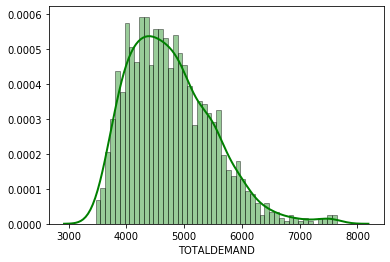

In [9]:
sb.distplot(energy_data['TOTALDEMAND'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

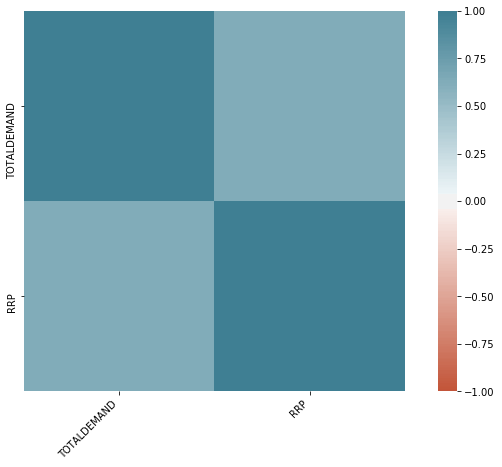

In [10]:
# Correlation Matrix

import seaborn as sb
corr = energy_data.corr()
plt.figure(figsize=(12,7))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
energy_data1 = energy_data.drop(columns=['REGION','SETTLEMENTDATE', 'PERIODTYPE'])
energy_data1.shape

(1392, 2)

In [14]:
energy_data1 = energy_data1.round(3)
energy_data1

,TOTALDEMAND,RRP
0,5789.46,65.26
1,5657.29,75.20
2,5478.56,43.39
3,5286.05,39.60
4,5151.68,24.05
...,...,...
1387,4338.92,48.74
1388,4259.62,48.34
1389,4293.57,45.76
1390,4487.10,65.20


In [18]:
Y = energy_data1.iloc[:,0]
print(Y.shape)
X = energy_data1.iloc[:,1:2]
X.shape

(1392,)


(1392, 1)

In [26]:
import random
from sklearn.model_selection import train_test_split
random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(1113, 1) (1113,)
(279, 1) (279,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
minmaxscaler=preprocessing.MinMaxScaler()
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train=minmaxscaler.fit_transform(Y_train.reshape(-1,1))
Y_test=minmaxscaler.fit_transform(Y_test.reshape(-1,1))


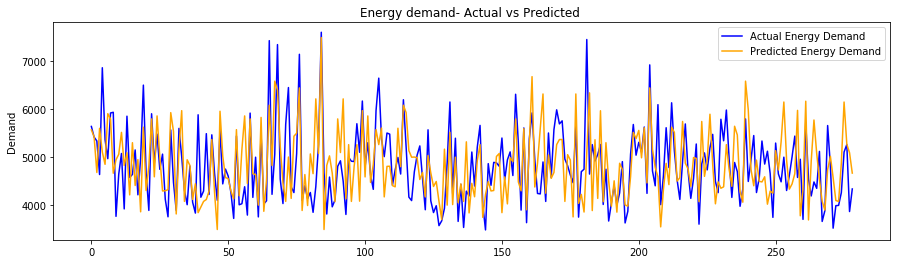

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=25, random_state=0,max_leaf_nodes=None)
regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
y_predict=regressor.predict(X_test.reshape(-1,1))

plt.figure(figsize=(15,4))
plt.plot(minmaxscaler.inverse_transform(Y_test.reshape(-1,1)), color='blue', label = 'Actual Energy Demand')
plt.plot(minmaxscaler.inverse_transform(y_predict.reshape(-1,1)), color='orange', label = 'Predicted Energy Demand')
plt.title('Energy demand- Actual vs Predicted ')
plt.ylabel('Demand')
plt.legend()